In [34]:
# import necessary libraries
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from Library.Integration import*
from Library.Root import*
from Library.Diff_eqn import*
import pandas as pd
import prettytable as pt

In [35]:
#defining the trancted number function
def truncated_number(x, n):
    return int(x*10**n)/10**n

# Q.1 Solve exp(−x) − x = 0 using fixed-point method, accurate up to 4 places in decimal.

In [36]:
# Define the function for root finding
def root_f(x):
    return np.exp(-x) - x

In [37]:
R = RootFindings(root_f, 1, 2, 0.00001,100)
#find the interval of the root
R.bracket(5,1.5)

a= -0.5 ,b= 2 
Iterations: 6 



(-0.5, 2)

In [38]:
print("The root of the function upto 4 decimal place is: ", truncated_number(R.fixed_point((lambda x: np.exp(-x)),0.2), 4))

The root of the function upto 4 decimal place is:  0.5671


# Q.2 Integrate the function f(x) = $\sqrt{1 + x^4}$ over the interval [0, 1] 

In [39]:
# Define the function for integration
def fun(x):
    return np.sqrt(1+x**4)

# <h2> Using Simpson’s rule 

In [40]:
K = NumericalIntegration(fun, 0, 1, 8)
s = K.simpson()
print("The integral of the function using Simpson's rule is upto 6 decimal places is:", truncated_number(s, 6))

The integral of the function using Simpson's rule is upto 6 decimal places is: 1.089429


# <h2> Using Gaussian quadrature

In [41]:
M = NumericalIntegration(fun, 0, 1, 5)
g = M.gaussian_quadrature()
print("The integral of the function using Gaussian Quadrature is upto 6 decimal places is:", truncated_number(g, 6))

The integral of the function using Gaussian Quadrature is upto 6 decimal places is: 1.089429


# Q.3 Solve y' = $\frac{5x^2 - y}{e^{x+y}}$, y(0) = 1 using RK4 with interval sizes 0.5, 0.2, 0.05 and 0.01

In [42]:
#define the function for differentiation
def diff_f(x, y):
    return (5*x**2 - y)/math.exp(x+y)

# <h2> h = 0.5

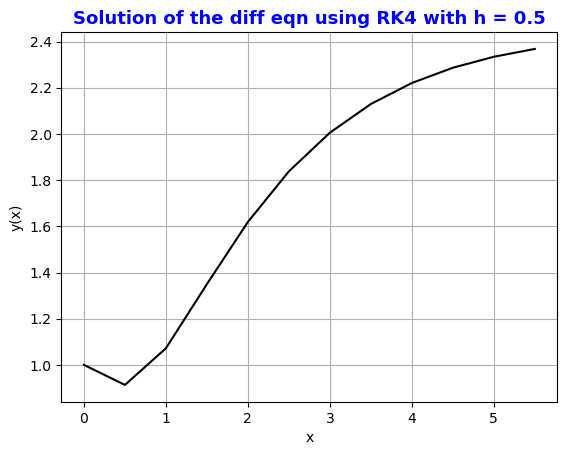

The values of x and y are:
      x         y
0   0.0  1.000000
1   0.5  0.913193
2   1.0  1.071926
3   1.5  1.349783
4   2.0  1.619126
5   2.5  1.838249
6   3.0  2.005498
7   3.5  2.129750
8   4.0  2.220765
9   4.5  2.286800
10  5.0  2.334331
11  5.5  2.368287


In [43]:
D = DifferentialEquation1(diff_f, 0, 6, 1, 0.5)
# After calling runge_kutta4 method
x_values, y_values = D.runge_kutta4()
# Create a DataFrame to store the values of x and y
print("The values of x and y are:")
data = {'x': x_values, 'y': y_values}
df = pd.DataFrame(data)
print(df)

# <h2> h = 0.2

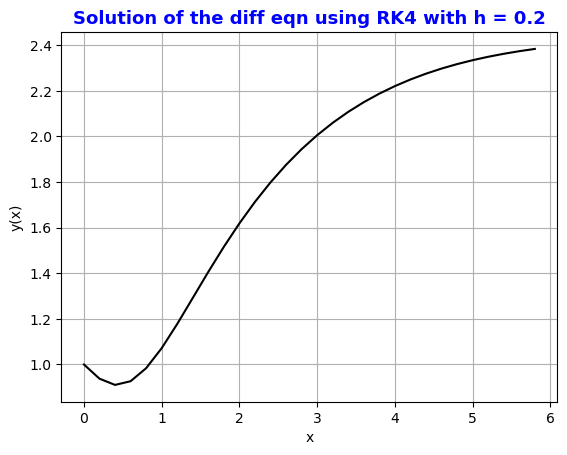

The values of x and y are:
      x         y
0   0.0  1.000000
1   0.2  0.937797
2   0.4  0.910445
3   0.6  0.926711
4   0.8  0.983812
5   1.0  1.071586
6   1.2  1.177827
7   1.4  1.291957
8   1.6  1.406358
9   1.8  1.516227
10  2.0  1.618896
11  2.2  1.713130
12  2.4  1.798584
13  2.6  1.875439
14  2.8  1.944157
15  3.0  2.005339
16  3.2  2.059638
17  3.4  2.107710
18  3.6  2.150183
19  3.8  2.187644
20  4.0  2.220636
21  4.2  2.249650
22  4.4  2.275135
23  4.6  2.297490
24  4.8  2.317076
25  5.0  2.334216
26  5.2  2.349198
27  5.4  2.362277
28  5.6  2.373682
29  5.8  2.383615


In [44]:
E = DifferentialEquation1(diff_f, 0, 6, 1, 0.2)
# After calling runge_kutta4 method
x_values, y_values = E.runge_kutta4()
# Create a DataFrame to store the values of x and y
print("The values of x and y are:")
data = {'x': x_values, 'y': y_values}
df = pd.DataFrame(data)
print(df)

# <h2> h = 0.05

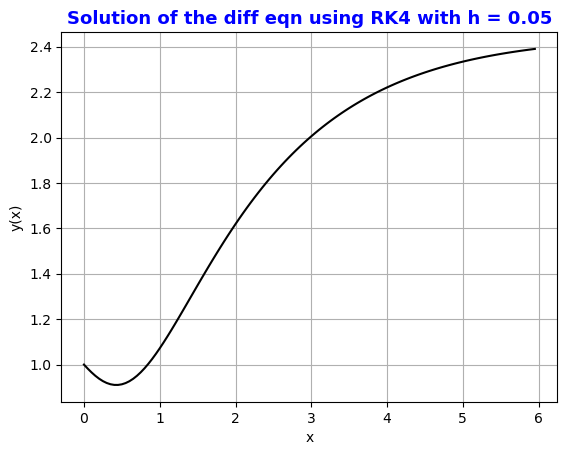

The values of x and y are:
        x         y
0    0.00  1.000000
1    0.05  0.982134
2    0.10  0.965583
3    0.15  0.950700
4    0.20  0.937796
..    ...       ...
115  5.75  2.381257
116  5.80  2.383612
117  5.85  2.385887
118  5.90  2.388084
119  5.95  2.390205

[120 rows x 2 columns]


In [45]:
F = DifferentialEquation1(diff_f, 0, 6, 1, 0.05)
# After calling runge_kutta4 method
x_values, y_values = F.runge_kutta4()
# Create a DataFrame to store the values of x and y
print("The values of x and y are:")
data = {'x': x_values, 'y': y_values}
df = pd.DataFrame(data)
print(df)

# <h2> h = 0.01

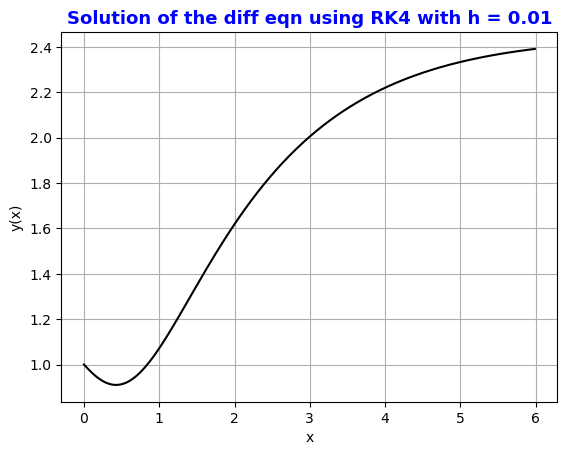

The values of x and y are:
        x         y
0    0.00  1.000000
1    0.01  0.996340
2    0.02  0.992720
3    0.03  0.989144
4    0.04  0.985614
..    ...       ...
595  5.95  2.390205
596  5.96  2.390621
597  5.97  2.391033
598  5.98  2.391443
599  5.99  2.391850

[600 rows x 2 columns]


In [46]:
G = DifferentialEquation1(diff_f, 0, 6, 1, 0.01)
# After calling runge_kutta4 method
x_values, y_values = G.runge_kutta4()
# Create a DataFrame to store the values of x and y
print("The values of x and y are:")
data = {'x': x_values, 'y': y_values}
df = pd.DataFrame(data)
print(df)

# Q.4 Solve the heat equation $u_t = 4u_{xx}$, using Crank-Nicolson by choosing suitable $\alpha$, subjected to the boundary conditions u(0, t) = 0 = u(8, t) and $u(x, 0) = 4x − x^2/2$

In [47]:
# Initial condition of the heat equation
def initial_condition(x):
    return  4*x - (x**2)/2

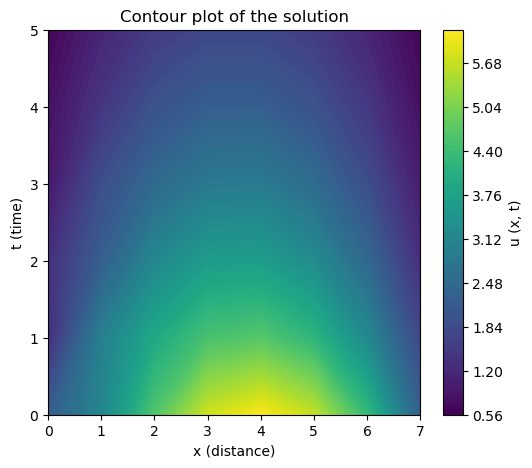

Solution of the heat equation using Crank-Nicolson method in a DataFrame:
          0         1         2         3         4         5         6  \
0  2.202399  3.107198  4.619195  5.750387  6.131966  5.645511  4.304567   
1  1.292751  2.973455  3.913217  4.527806  4.669426  4.216541  3.189175   
2  1.302117  2.225648  3.142314  3.613251  3.642601  3.239632  2.434234   
3  0.932008  1.872492  2.466685  2.830978  2.854586  2.522497  1.875703   
4  0.788957  1.426386  1.964002  2.228833  2.232206  1.968895  1.466687   
5  0.596226  1.151250  1.530950  1.750383  1.752824  1.542567  1.144879   

          7  
0  2.268189  
1  1.741851  
2  1.293853  
3  1.005361  
4  0.779009  
5  0.610852  


In [48]:
# Call the crank_nicolson method
C = CrankNicolsonSolver(initial_condition, 8, 6, 0.5, 4)
s = C.heat_eqn_solve()
# Create a Pandas DataFrame from the stored solutions
df = pd.DataFrame(s)


# Plot a contour plot using the Pandas DataFrame
plt.figure(figsize=(6, 5))
contour_plot = plt.contourf(df.columns, df.index, df.values, cmap='viridis',levels=70)
plt.colorbar(contour_plot, label='u (x, t)')
plt.xlabel('x (distance)')
plt.ylabel('t (time)')
plt.title('Contour plot of the solution')

# Show the plot
plt.show()
# Print the Pandas DataFrame to the console
print("Solution of the heat equation using Crank-Nicolson method in a DataFrame:")
print(df)


# Q.5 Solve Possion's equation $\nabla^2 u = xe^y$ , subjected to the boundary conditions $u(0, y) = 0, u(2, y)  = 2e^y$ and $u(x, 0) = x, u(x, 1) = xe$

In [49]:
# Define grid size
N = 26
x = np.linspace(0, 2, N)
y = np.linspace(0, 1, N)
X, Y = np.meshgrid(x, y)
hx = 2/(N+1)
hy = 1/(N+1)
# Initialize solution matrix
u = np.zeros((N, N))

# Boundary conditions
u[0, :] = 0
u[-1, :] = 2 * np.exp(y)
u[:, 0] = x
u[:, -1] = x * np.exp(1)

# Define tolerance and maximum number of iterations
tolerance = 1e-6
max_iter = 10000
# h = N/()
# Define source term
f = -X * np.exp(Y) 
# Gauss-Seidel iterative method
for _ in range(max_iter):
    u_old = u.copy()
    for i in range(1, N - 1):
        for j in range(1, N - 1):
            u[i, j] = 0.25 * (u[i+1, j] + u[i-1, j] + u[i, j+1] + u[i, j-1])
            u[i,j] += 0.25 * hx*hy * f[i,j]
    # print(u)
    if np.max(np.abs(u - u_old)) < tolerance:
        break
# print(u)
# Display the solution in a table
# print("Solution (u):")
# print(u)

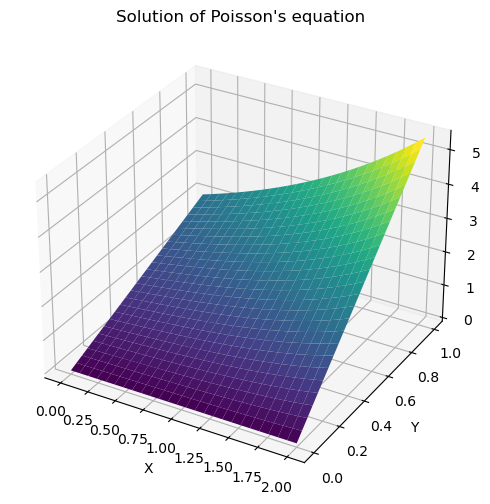

In [50]:
# Display the solution in a 3D plot
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, u, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Solution (u)')
ax.set_title('Solution of Poisson\'s equation')
plt.show()


0.03076923076923077
0.015384615384615385
     0             1             2             3             4             5   \
0   0.0  3.076923e-02  6.153846e-02  9.230769e-02  1.230769e-01  1.538462e-01   
1   0.0  3.076916e-03  6.156752e-03  9.236591e-03  1.231643e-02  1.539627e-02   
2   0.0  3.076776e-04  6.159523e-04  9.242278e-04  1.232503e-03  1.540779e-03   
3   0.0  3.074676e-05  6.160301e-05  9.245944e-05  1.233159e-04  1.541723e-04   
4   0.0  3.046669e-06  6.134744e-06  9.222870e-06  1.231099e-05  1.539910e-05   
..  ...           ...           ...           ...           ...           ...   
61  0.0 -4.736965e-07 -4.815379e-07 -4.890040e-07 -4.965853e-07 -5.042841e-07   
62  0.0 -4.814762e-07 -4.894464e-07 -4.970351e-07 -5.047409e-07 -5.125662e-07   
63  0.0 -4.892559e-07 -4.973549e-07 -5.050662e-07 -5.128965e-07 -5.208482e-07   
64  0.0  8.363447e-03  1.673530e-02  2.510716e-02  3.347903e-02  4.185089e-02   
65  0.0  8.363944e-02  1.672789e-01  2.509183e-01  3.345578e-01  4.1

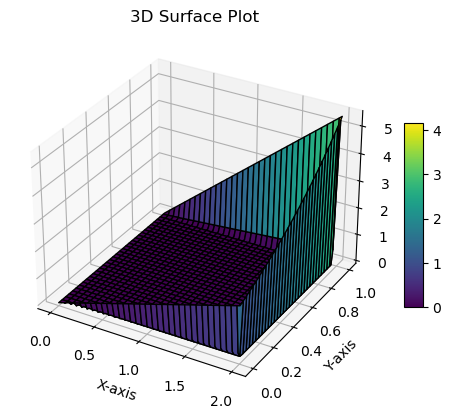

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate a 1D array 'x' with 36 points from 0 to 2 and the step size 'dx'
# Generate a 1D array 'y' with 36 points from 0 to 1 and the step size 'dy'
x, dx = np.linspace(0, 2, 66, retstep=True)
y, dy = np.linspace(0, 1, 66, retstep=True)
print(dx)
print(dy)
# Create 2D grids 'X' and 'Y' using meshgrid from 'x' and 'y'
X, Y = np.meshgrid(x, y)

# Initialize a 2D array 'u' with zeros and shape (36, 36)
u = np.zeros((66, 66))

# Set boundary conditions for the top and sides of the grid
for i in range(len(x)):
    u[i, -1] = 2 * np.exp(y[i])

for i in range(len(x)):
    u[0, i] = x[i]
    u[-1, i] = x[i] * np.exp(1)

# Initialize a variable 'n' to zero for the while loop
n = 0

# Iterative loop to solve the differential equation (finite difference method)
while n <= 1000:
    for i in range(1, 65):
        for j in range(1, 65):
            # Update the value of 'u' using finite difference method
            u[i, j] = ((1 / ((dx ** 2 + dy ** 2) * 2)) * ((u[i + 1, j] + u[i - 1, j]) * dy ** 2) +
                       ((u[i, j + 1] + u[i, j - 1]) * dx ** 2) - (dx ** 2 * dy ** 2 * x[i] * np.exp(y[j])))
            n += 1

# Create a DataFrame 'df' from the array 'u'
df = pd.DataFrame(u)
print(df)

# Create a 3D plot using matplotlib
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface using the values from the DataFrame
surf = ax.plot_surface(X, Y, df.values, cmap='viridis', edgecolor='k')

# Set labels for the axes and title for the plot
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('3D Surface Plot')

# Add a colorbar to the plot
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)

# Display the plot
plt.show()